# Problem Statement
**Predict the resale price of vehicle based on it's characteristics.**

In [2]:
# Install Dependencies
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as pp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import regularizers

# Data understanding & Exploration

In [3]:
# Load Dataset
df = pd.read_csv("ann_regression_vehicle_price.csv")
df.head()

,engine_size,horsepower,vehicle_age,mileage,brand_score,resale_price
0,2.498160,87.054968,2.534026,45537.81975,7.824369,8.631894e+05
1,4.802857,245.347028,4.178855,10173.77976,1.221282,1.260854e+06
2,3.927976,248.409590,2.655157,40379.90984,1.199112,1.031494e+06
3,3.394634,280.351868,1.330538,118693.10440,3.912492,8.798511e+05
4,1.624075,309.610140,1.809538,87177.78737,5.397789,8.528856e+05


In [4]:
df.describe()

,engine_size,horsepower,vehicle_age,mileage,brand_score,resale_price
count,300.000000,300.000000,300.000000,300.000000,300.000000,3.000000e+02
mean,2.980818,238.574396,7.066334,106302.088422,5.501462,8.155668e+05
std,1.177362,99.854819,4.251412,57876.231977,2.630135,2.245395e+05
min,1.020246,73.576425,0.069480,6245.244985,1.044460,1.644224e+05
25%,1.956323,152.372924,3.146498,55512.701805,3.134531,6.567004e+05
50%,3.046871,242.161915,6.792963,111543.936000,5.452537,8.241511e+05
75%,4.027438,325.202871,10.754825,158550.712625,7.605417,9.671881e+05
max,4.960215,399.906832,14.953114,199597.151600,9.994724,1.328714e+06


# Data Preprocessing

In [5]:
# Split features & target
x = df.drop("resale_price", axis = 1)
y = df["resale_price"]

In [6]:
# Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [7]:
# Features Scaling
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# Modelling

In [8]:
# Define NN

model = Sequential()

model.add(Input(shape = (x_train.shape[1],)))
model.add(Dense(32, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mse")

In [9]:
# Train model
history = model.fit(x_train, y_train, epochs = 500, batch_size = 32, validation_split = 0.2)

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 690121539584.0000 - val_loss: 765460676608.0000
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 690121211904.0000 - val_loss: 765460283392.0000
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 690120818688.0000 - val_loss: 765459759104.0000
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 690120228864.0000 - val_loss: 765458972672.0000
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 690119245824.0000 - val_loss: 765457661952.0000
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 690117738496.0000 - val_loss: 765455499264.0000
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 690115182592.0000 - val_loss: 765451894784.0000
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 690110791680.0000 - val_loss: 765445799936.0000
Epoch 9/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 690103320576.0000 - val_loss: 765435510784.0000
Epoch 10/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms

# Evaluation

In [10]:
# Predictions
ypred_test = model.predict(x_test).flatten()
ypred_train = model.predict(x_train).flatten()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [11]:
# metrics
test_mse = mean_squared_error(y_test, ypred_test)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, ypred_test)

print("Test_RMSE: ", test_rmse)
print("Test_R2 score: ",test_r2)

train_mse = mean_squared_error(y_train, ypred_train)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, ypred_train)

print("Train_RMSE: ", train_rmse)
print("Train_R2 score: ",train_r2)

Test_RMSE:  35721.671638382846
Test_R2 score:  0.9751470929840839
Train_RMSE:  34208.24709955576
Train_R2 score:  0.9765001734462917


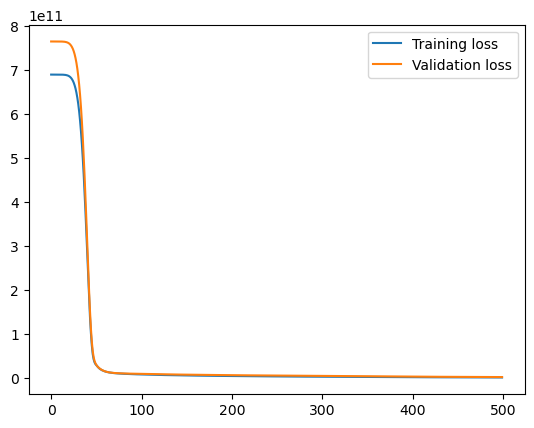

In [12]:
# Training curve
pp.plot(history.history["loss"], label = "Training loss")
pp.plot(history.history["val_loss"], label = "Validation loss")
pp.legend()
pp.show()

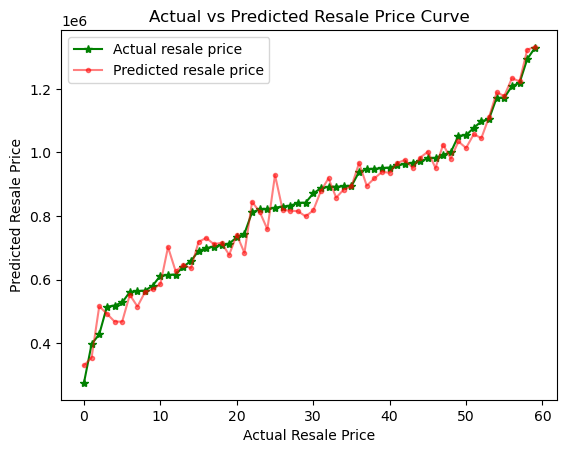

In [32]:

y_test_arr = np.array(y_test)
y_pred_arr = np.array(ypred_test)

# Sort by actual values for a smooth curve
sorted_index = np.argsort(y_test_arr)

x_actual = y_test_arr[sorted_index]
y_predicted = y_pred_arr[sorted_index]

pp.plot(x_actual, label = "Actual resale price", color = "green", marker = "*")
pp.plot(y_predicted, label = "Predicted resale price", color = "red", marker = ".",  alpha = 0.5)

pp.xlabel("Actual Resale Price")
pp.ylabel("Predicted Resale Price")
pp.title("Actual vs Predicted Resale Price Curve")
pp.legend()
pp.show()
